In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from dateutil.parser import parse
import numpy as np
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [2]:
events = pd.read_csv('data/events.csv')
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
events.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838.0,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3885.0,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4311.0,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [4]:
events.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

# Limpieza del Set de Datos

In [5]:
#Eliminamos la columna "url" ya que no proporciona ningun tipo de informacion siendo el valor top "/"
#Tambien la columna "skus" ya que nos vamos a enfocar en la columna "sku" del id del producto
#y la columna "city" ya que el valor top es "Unknown" y alcanza con analizar region y country
#Ademas, eliminamos las columnas "campaign_source", "search_engine" y "channel" ya que son datos de campañas 
#y viendo que el top de busqueda es Google, es un dato previsible
events.drop(['url','skus','city', 'campaign_source','search_engine','channel'], inplace=True, axis=1)

In [6]:
#Cambiamos el tipo de dato de fecha de timestamp a datetime para un mejor analisis y renombramos a "fecha"
events[['timestamp']] = events[['timestamp']].apply(pd.to_datetime)
events.rename({
    'timestamp' : 'fecha',
}, axis=1, inplace=True)
events.head()

,fecha,event,person,sku,model,condition,storage,color,search_term,staticpage,new_vs_returning,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Analizar cuál es el tipo de evento predominante en el set de datos. 
2. Calcular el Top 5 de productos (identificados por sku) con mayor cantidad de conversiones.
3. Calcular el Top 5 de dispositivos más visitados dentro de la categoría Smartphones.
4. Averiguar cuáles son los 10 usuarios que registraron más actividad en la plataforma (es decir, realizaron más eventos).

In [7]:
#1 eventos predominantes (total 11)
pred_event = events.loc[:, ['event']]
pred_event= pred_event.groupby('event').size() 
pred_event = pred_event.reset_index()
pred_event.rename({
    0:'count'
}, axis=1, inplace=True)
pred_event.sort_values(by='count', ascending=False, inplace=True)
pred_event.head(11)

,event,count
9,viewed product,528931
1,brand listing,98635
10,visited site,87378
0,ad campaign hit,82827
4,generic listing,67534
7,searched products,56073
6,search engine hit,50957
2,checkout,33735
8,staticpage,3598
3,conversion,1172


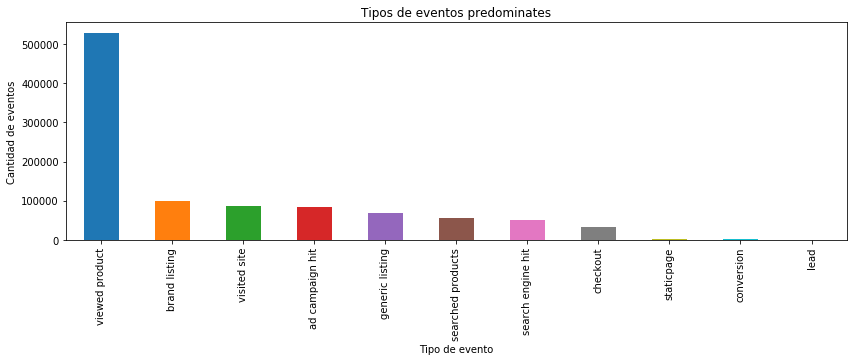

In [8]:
plot_event = pred_event.plot(x='event', y='count', title = "Tipos de eventos predominates",kind='bar',figsize=(14,4))
plot_event.set_ylabel('Cantidad de eventos')
plot_event.set_xlabel('Tipo de evento')
plot_event.legend().set_visible(False)
plt.show()

In [9]:
#3 Top5 device model donde device_type = Smartphone donde el evento sea viewed product
devices = events.loc[:,['event', 'model','device_type']]
devices = devices.loc[devices.event == 'viewed product']
#devices = devices.loc[devices.device_type == 'Smartphone']
devices = devices.loc[:,['model']]
devices = devices.groupby('model').size()
devices = devices.reset_index()
devices.rename({
    0:'count'
}, axis=1, inplace=True)
devices.sort_values(by='count', ascending=False, inplace=True)
devices.head(10)


,model,count
190,iPhone 6,47538
189,iPhone 5s,42045
192,iPhone 6S,36930
194,iPhone 7,26330
132,Samsung Galaxy S7 Edge,23062
131,Samsung Galaxy S7,18085
195,iPhone 7 Plus,17853
198,iPhone SE,15874
133,Samsung Galaxy S8,15868
193,iPhone 6S Plus,12250


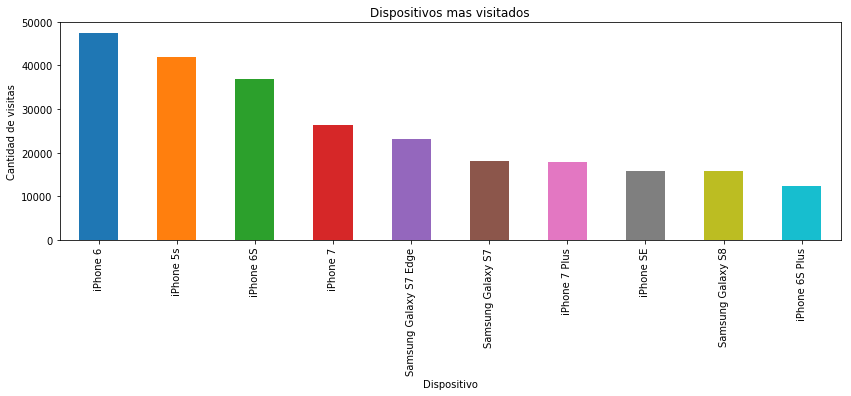

In [10]:
plot_device = devices.head(10)
plot_device = plot_device.plot(x='model', y='count', title = "Dispositivos mas visitados",kind='bar',figsize=(14,4))
plot_device.set_ylabel('Cantidad de visitas')
plot_device.set_xlabel('Dispositivo')
plot_device.legend().set_visible(False)
plt.show()

# Analisis de visitas en el sitio

In [11]:
visitas = events.loc[:,['event','fecha','new_vs_returning','region','country','device_type','screen_resolution','operating_system_version','browser_version']]
visitas = visitas.loc[visitas.event == 'visited site']
visitas.head()

,event,fecha,new_vs_returning,region,country,device_type,screen_resolution,operating_system_version,browser_version
1,visited site,2018-05-31 23:38:05,New,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
5,visited site,2018-05-29 13:29:26,New,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
9,visited site,2018-04-09 20:12:31,New,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0
16,visited site,2018-05-24 11:21:07,Returning,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 66.0
45,visited site,2018-04-06 05:12:05,New,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0


### Relacion de visitas en el sitio por dia y hora de la semana

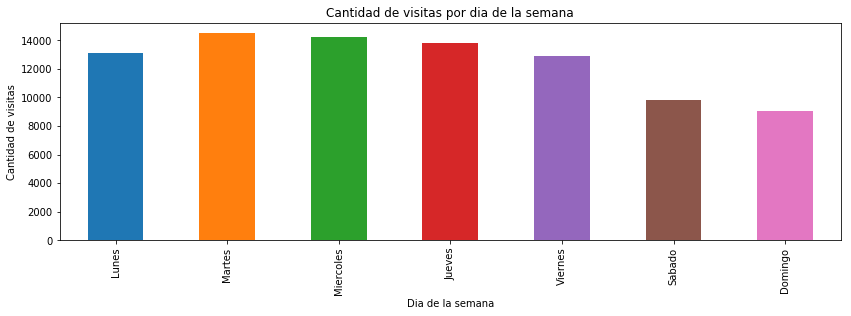

In [12]:
visitas_dias = visitas.loc[:,['event', 'fecha']]

visitas_dias['weekday'] = visitas_dias['fecha'].dt.weekday_name
visitas_dias['dayofweek'] = visitas_dias['fecha'].dt.dayofweek
visitas_dias_groupby = visitas_dias.groupby(['dayofweek','weekday']).count()['fecha'].reset_index()
visitas_dias_groupby.set_index('weekday', inplace=True)
visitas_dias_groupby.drop('dayofweek', inplace=True, axis=1)
visitas_dias_groupby.index.name = None
visitas_dias_groupby.rename({
    'Monday' : 'Lunes',
    'Tuesday' : 'Martes',
    'Wednesday' : 'Miercoles',
    'Thursday' : 'Jueves',
    'Friday' : 'Viernes',
    'Saturday' : 'Sabado',
    'Sunday' : 'Domingo'
}, axis=0, inplace=True)

plot_visitas_dias = visitas_dias_groupby.plot(y='fecha', title = "Cantidad de visitas por dia de la semana",kind='bar',figsize=(14,4))
plot_visitas_dias.set_ylabel('Cantidad de visitas')
plot_visitas_dias.set_xlabel('Dia de la semana')
plot_visitas_dias.legend().set_visible(False)
plt.show()

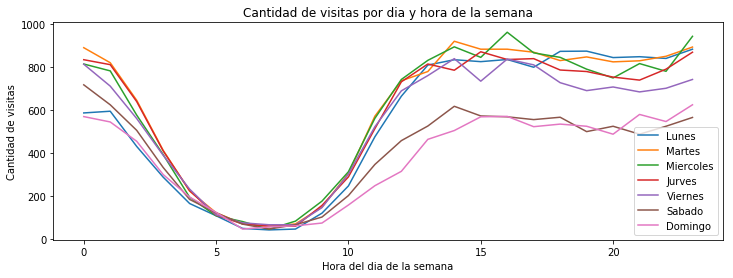

In [13]:
visitas_dyh = visitas_dias

visitas_dyh['hour'] = visitas_dyh['fecha'].dt.hour
visitas_dyh = visitas_dyh.loc[:,['event','weekday','hour']]

#separo por dia
lunes = visitas_dyh[visitas_dyh.weekday == 'Monday']
martes = visitas_dyh[visitas_dyh.weekday == 'Tuesday']
miercoles = visitas_dyh[visitas_dyh.weekday == 'Wednesday']
jueves = visitas_dyh[visitas_dyh.weekday == 'Thursday']
viernes = visitas_dyh[visitas_dyh.weekday == 'Friday']
sabado = visitas_dyh[visitas_dyh.weekday == 'Saturday']
domingo = visitas_dyh[visitas_dyh.weekday == 'Sunday']

#agrupo por hora por cada dia con la cantidad de postulaciones
lunes = lunes.groupby('hour', as_index=False)['event'].count()
lunes.columns = ['hour', 'Lunes']
martes = martes.groupby('hour', as_index=False)['event'].count()
martes.columns = ['hour', 'Martes']
miercoles = miercoles.groupby('hour', as_index=False)['event'].count()
miercoles.columns = ['hour', 'Miercoles']
jueves = jueves.groupby('hour', as_index=False)['event'].count()
jueves.columns = ['hour', 'Jurves']
viernes = viernes.groupby('hour', as_index=False)['event'].count()
viernes.columns = ['hour', 'Viernes']
sabado = sabado.groupby('hour', as_index=False)['event'].count()
sabado.columns = ['hour', 'Sabado']
domingo = domingo.groupby('hour', as_index=False)['event'].count()
domingo.columns = ['hour', 'Domingo']

#junto los dias
visitas_dyh = pd.merge(lunes, martes, on='hour', how="left")
visitas_dyh = pd.merge(visitas_dyh, miercoles, on='hour', how="left")
visitas_dyh = pd.merge(visitas_dyh, jueves, on='hour', how="left")
visitas_dyh = pd.merge(visitas_dyh, viernes, on='hour', how="left")
visitas_dyh = pd.merge(visitas_dyh, sabado, on='hour', how="left")
visitas_dyh = pd.merge(visitas_dyh, domingo, on='hour', how="left")

plot_visitas_dyh = visitas_dyh.plot(x='hour', title="Cantidad de visitas por dia y hora de la semana", figsize=(12,4))
plot_visitas_dyh.set_ylabel('Cantidad de visitas')
plot_visitas_dyh.set_xlabel('Hora del dia de la semana')
plt.show()

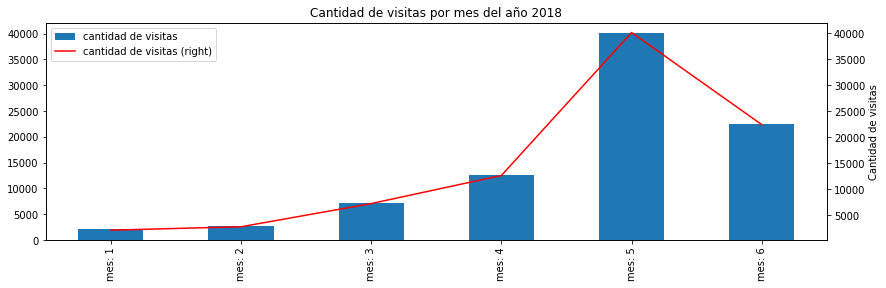

In [14]:
#Por meses del anio 2018
visitas_anio = visitas.loc[:,['event', 'fecha']]
visitas_anio = visitas_anio.loc[visitas_anio['fecha'].dt.year  == 2018]
visitas_anio['fecha'] = "mes: " + visitas_anio['fecha'].dt.month.astype(str)
visitas_anio_groupby = visitas_anio.groupby('fecha').count().reset_index()
visitas_anio_groupby.rename({'event' : 'cantidad de visitas'}, axis=1, inplace=True)
visitas_anio_groupby.set_index('fecha', inplace=True)
visitas_anio_groupby.index.name = None

ax = plt.gca()

visitas_anio_groupby.plot(rot=90, ax = ax, title = "Cantidad de visitas por mes del año 2018", kind='bar',figsize=(14,4))
visitas_anio_groupby.plot(rot=90, ax = ax, title = "Cantidad de visitas por mes del año 2018", kind='line',figsize=(14,4), secondary_y=True, color='red')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de visitas');

# Analisis de eventos de productos

In [15]:
#Los eventos de productos son las rows donde existe "sku" (id del producto)
eventos_productos = events.loc[:, ['event','fecha','sku', 'model', 'condition', 'storage', 'color']]
eventos_productos = eventos_productos.loc[eventos_productos.sku.notnull()]
eventos_productos_distintos = eventos_productos.groupby('event').count()
eventos_productos_distintos.head()
#Por lo tanto, son 3 eventos de productos: viewed product, checkout y conversion

,fecha,sku,model,condition,storage,color
event,,,,,,
checkout,33735,33735,33733,33733,33733,33733
conversion,1172,1172,1172,1172,1172,1172
viewed product,528931,528931,528931,528931,528931,528931


### Relacion de eventos de productos por dia y hora de la semana

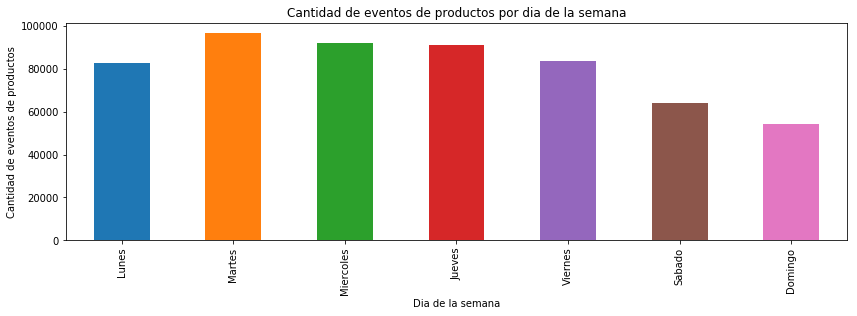

In [16]:
eventos_productos_dias = eventos_productos.loc[:,['event','fecha']]

eventos_productos_dias['weekday'] = eventos_productos_dias['fecha'].dt.weekday_name
eventos_productos_dias['dayofweek'] = eventos_productos_dias['fecha'].dt.dayofweek
eventos_productos_dias_groupby = eventos_productos_dias.groupby(['dayofweek','weekday']).count()['fecha'].reset_index()
eventos_productos_dias_groupby.set_index('weekday', inplace=True)
eventos_productos_dias_groupby.drop('dayofweek', inplace=True, axis=1)
eventos_productos_dias_groupby.index.name = None
eventos_productos_dias_groupby.rename({
    'Monday' : 'Lunes',
    'Tuesday' : 'Martes',
    'Wednesday' : 'Miercoles',
    'Thursday' : 'Jueves',
    'Friday' : 'Viernes',
    'Saturday' : 'Sabado',
    'Sunday' : 'Domingo'
}, axis=0, inplace=True)

plot_eventos_productos_dias = eventos_productos_dias_groupby.plot(y='fecha', title = "Cantidad de eventos de productos por dia de la semana",kind='bar',figsize=(14,4))
plot_eventos_productos_dias.set_ylabel('Cantidad de eventos de productos')
plot_eventos_productos_dias.set_xlabel('Dia de la semana')
plot_eventos_productos_dias.legend().set_visible(False)
plt.show()

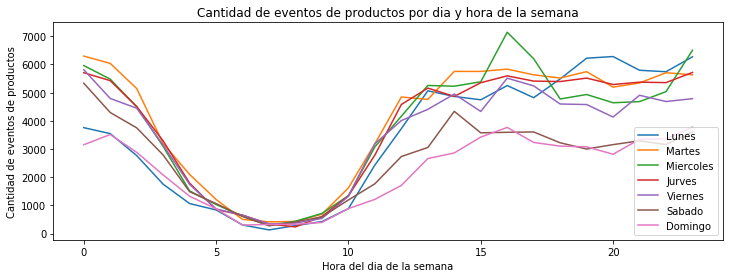

In [17]:
eventos_productos_dyh = eventos_productos_dias

eventos_productos_dyh['hour'] = eventos_productos_dyh['fecha'].dt.hour
eventos_productos_dyh = eventos_productos_dyh.loc[:,['event','weekday','hour']]

#separo por dia
lunes = eventos_productos_dyh[eventos_productos_dyh.weekday == 'Monday']
martes = eventos_productos_dyh[eventos_productos_dyh.weekday == 'Tuesday']
miercoles = eventos_productos_dyh[eventos_productos_dyh.weekday == 'Wednesday']
jueves = eventos_productos_dyh[eventos_productos_dyh.weekday == 'Thursday']
viernes = eventos_productos_dyh[eventos_productos_dyh.weekday == 'Friday']
sabado = eventos_productos_dyh[eventos_productos_dyh.weekday == 'Saturday']
domingo = eventos_productos_dyh[eventos_productos_dyh.weekday == 'Sunday']

#agrupo por hora por cada dia con la cantidad de postulaciones
lunes = lunes.groupby('hour', as_index=False)['event'].count()
lunes.columns = ['hour', 'Lunes']
martes = martes.groupby('hour', as_index=False)['event'].count()
martes.columns = ['hour', 'Martes']
miercoles = miercoles.groupby('hour', as_index=False)['event'].count()
miercoles.columns = ['hour', 'Miercoles']
jueves = jueves.groupby('hour', as_index=False)['event'].count()
jueves.columns = ['hour', 'Jurves']
viernes = viernes.groupby('hour', as_index=False)['event'].count()
viernes.columns = ['hour', 'Viernes']
sabado = sabado.groupby('hour', as_index=False)['event'].count()
sabado.columns = ['hour', 'Sabado']
domingo = domingo.groupby('hour', as_index=False)['event'].count()
domingo.columns = ['hour', 'Domingo']

#junto los dias
eventos_productos_dyh = pd.merge(lunes, martes, on='hour', how="left")
eventos_productos_dyh = pd.merge(eventos_productos_dyh, miercoles, on='hour', how="left")
eventos_productos_dyh = pd.merge(eventos_productos_dyh, jueves, on='hour', how="left")
eventos_productos_dyh = pd.merge(eventos_productos_dyh, viernes, on='hour', how="left")
eventos_productos_dyh = pd.merge(eventos_productos_dyh, sabado, on='hour', how="left")
eventos_productos_dyh = pd.merge(eventos_productos_dyh, domingo, on='hour', how="left")

eventos_productos_dyh = eventos_productos_dyh.plot(x='hour', title="Cantidad de eventos de productos por dia y hora de la semana", figsize=(12,4))
eventos_productos_dyh.set_ylabel('Cantidad de eventos de productos')
eventos_productos_dyh.set_xlabel('Hora del dia de la semana')
plt.show()

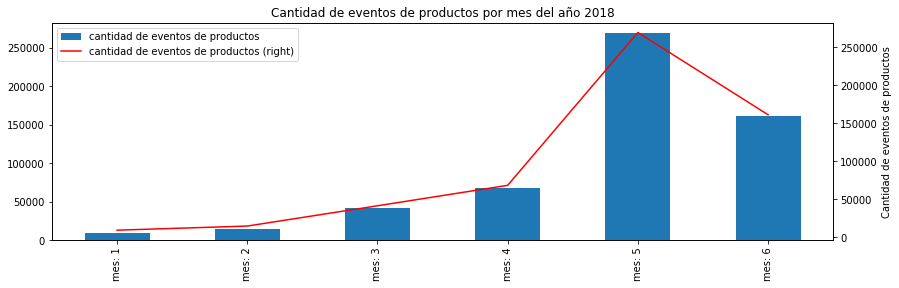

In [18]:
#Por meses del anio 2018
eventos_productos_anio = eventos_productos.loc[:,['event', 'fecha']]
eventos_productos_anio = eventos_productos_anio.loc[eventos_productos_anio['fecha'].dt.year  == 2018]
eventos_productos_anio['fecha'] = "mes: " + eventos_productos_anio['fecha'].dt.month.astype(str)
eventos_productos_anio_groupby = eventos_productos_anio.groupby('fecha').count().reset_index()
eventos_productos_anio_groupby.rename({'event' : 'cantidad de eventos de productos'}, axis=1, inplace=True)
eventos_productos_anio_groupby.set_index('fecha', inplace=True)
eventos_productos_anio_groupby.index.name = None

ax = plt.gca()

eventos_productos_anio_groupby.plot(rot=90, ax = ax, title = "Cantidad de eventos de productos por mes del año 2018", kind='bar',figsize=(14,4))
eventos_productos_anio_groupby.plot(rot=90, ax = ax, title = "Cantidad de eventos de productos por mes del año 2018", kind='line',figsize=(14,4), secondary_y=True, color='red')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de eventos de productos');